In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
X_all = pd.read_csv("./new_data/TrainingData/combined_x.csv", header=None)
y = pd.read_csv("./new_data/TrainingData/combined_y.csv", header=None)
X = X_all.iloc[:, :6]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ("rf_clf", RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

/Users/subodhgujar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Random Forest accuracy:  0.7712592703014944
Random Forest f1:  0.6897062083227102
              precision    recall  f1-score   support

           0       0.77      0.99      0.87    201577
           1       0.81      0.01      0.03     11125
           2       0.78      0.37      0.51     14576
           3       0.66      0.03      0.06     41052

    accuracy                           0.77    268330
   macro avg       0.76      0.35      0.36    268330
weighted avg       0.76      0.77      0.69    268330




Confusion Matrix: 

[[200124     25   1037    391]
 [ 10455    162    282    226]
 [  9116      1   5453      6]
 [ 39629     13    197   1213]]


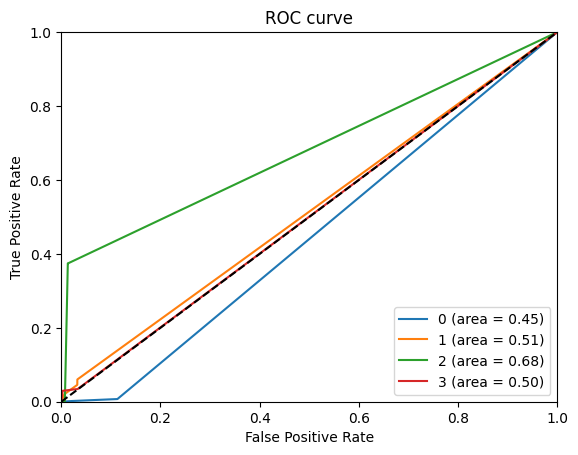

In [11]:
print("Random Forest accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest f1: ", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))
print("\n\n\nConfusion Matrix: \n")

print(confusion_matrix(y_test, y_pred_rf))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()



In [12]:
#pipeline for ada boost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = Pipeline([
    ("ada_clf", AdaBoostClassifier(n_estimators=100, random_state=42))
])

ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)


/Users/subodhgujar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ada Boost accuracy:  0.7528043826631386
Ada Boost f1:  0.6578818625026077
              precision    recall  f1-score   support

           0       0.76      0.99      0.86    201577
           1       0.09      0.00      0.00     11125
           2       0.49      0.15      0.23     14576
           3       0.34      0.00      0.00     41052

    accuracy                           0.75    268330
   macro avg       0.42      0.29      0.27    268330
weighted avg       0.65      0.75      0.66    268330




Confusion Matrix: 

[[199784     46   1692     55]
 [ 10883      7    233      2]
 [ 12388      0   2172     16]
 [ 40628     24    363     37]]


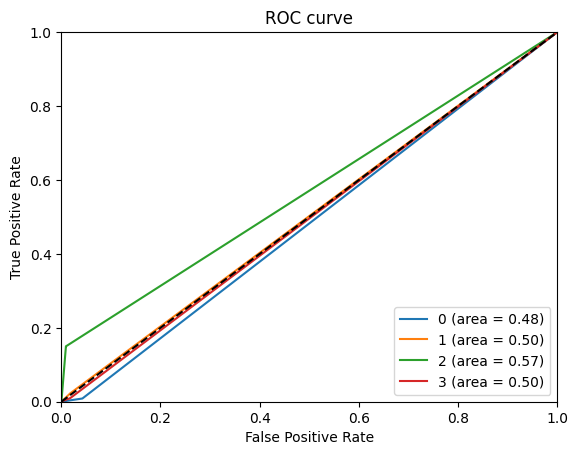

In [13]:
print("Ada Boost accuracy: ", accuracy_score(y_test, y_pred_ada))
print("Ada Boost f1: ", f1_score(y_test, y_pred_ada, average='weighted'))
print(classification_report(y_test, y_pred_ada))
print("\n\n\nConfusion Matrix: \n")

print(confusion_matrix(y_test, y_pred_ada))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()

In [14]:
#pipeline for xgboost
from xgboost import XGBClassifier

xgb_clf = Pipeline([
    ("xgb_clf", XGBClassifier(n_estimators=100, random_state=42))
])

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)


XGBoost accuracy:  0.7862072820780382
XGBoost f1:  0.7297732259080351
              precision    recall  f1-score   support

           0       0.79      0.98      0.88    201577
           1       0.66      0.21      0.32     11125
           2       0.73      0.56      0.63     14576
           3       0.63      0.09      0.16     41052

    accuracy                           0.79    268330
   macro avg       0.70      0.46      0.50    268330
weighted avg       0.76      0.79      0.73    268330




Confusion Matrix: 

[[196794    838   2147   1798]
 [  8050   2378    387    310]
 [  6283    119   8098     76]
 [ 36646    282    431   3693]]


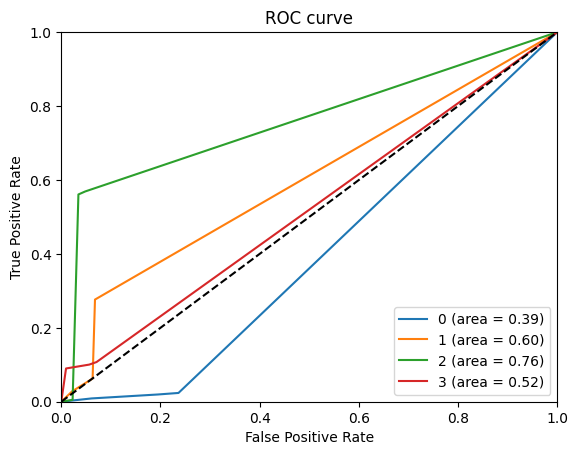

In [15]:
print("XGBoost accuracy: ", accuracy_score(y_test, y_pred_xgb))

print("XGBoost f1: ", f1_score(y_test, y_pred_xgb, average='weighted'))
print(classification_report(y_test, y_pred_xgb))
print("\n\n\nConfusion Matrix: \n")

print(confusion_matrix(y_test, y_pred_xgb))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()

In [16]:
#pipeline for ANN
from sklearn.neural_network import MLPClassifier

mlp_clf = Pipeline([
    ("mlp_clf", MLPClassifier(hidden_layer_sizes=(30,30,30,30,30), max_iter=100, random_state=42))
])

mlp_clf.fit(X_train, y_train)

y_pred_mlp = mlp_clf.predict(X_test)


/Users/subodhgujar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/subodhgujar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN accuracy:  0.7892334066261693
ANN f1:  0.7461706608185846
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    201577
           1       0.60      0.31      0.41     11125
           2       0.72      0.61      0.66     14576
           3       0.55      0.14      0.22     41052

    accuracy                           0.79    268330
   macro avg       0.67      0.51      0.54    268330
weighted avg       0.76      0.79      0.75    268330




Confusion Matrix: 

[[193682   1516   2439   3940]
 [  6709   3443    458    515]
 [  5217    252   8924    183]
 [ 34333    486    507   5726]]


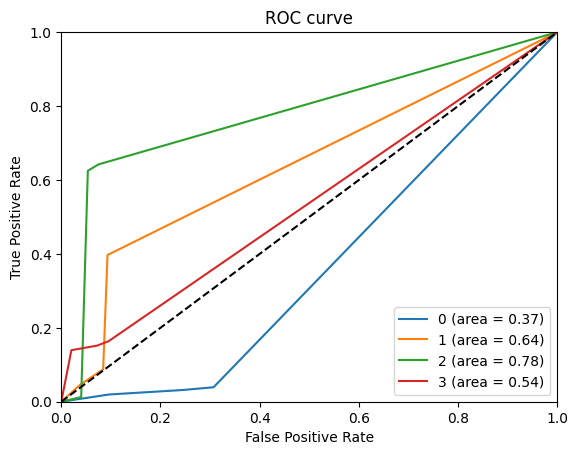

In [17]:
print("ANN accuracy: ", accuracy_score(y_test, y_pred_mlp))
print("ANN f1: ", f1_score(y_test, y_pred_mlp, average='weighted'))
print(classification_report(y_test, y_pred_mlp))

print("\n\n\nConfusion Matrix: \n")
print(confusion_matrix(y_test, y_pred_mlp))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()

In [ ]:
#pipeline for SVM
from sklearn.svm import SVC

svm_clf = Pipeline([
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, random_state=42))
])

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)


In [ ]:
print("SVM accuracy: ", accuracy_score(y_test, y_pred_svm))

print("SVM f1: ", f1_score(y_test, y_pred_svm, average='weighted'))

print(classification_report(y_test, y_pred_svm))

print("\n\n\nConfusion Matrix: \n")

print(confusion_matrix(y_test, y_pred_svm))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()

In [18]:
#pipeline for KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = Pipeline([
    ("knn_clf", KNeighborsClassifier(n_neighbors=3))
])

knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)


/Users/subodhgujar/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN accuracy:  0.76160697648418
KNN f1:  0.7382044336409747
              precision    recall  f1-score   support

           0       0.81      0.91      0.86    201577
           1       0.51      0.30      0.38     11125
           2       0.70      0.58      0.63     14576
           3       0.39      0.23      0.29     41052

    accuracy                           0.76    268330
   macro avg       0.60      0.50      0.54    268330
weighted avg       0.73      0.76      0.74    268330




Confusion Matrix: 

[[183311   2144   2716  13406]
 [  6588   3294    418    825]
 [  5413    346   8404    413]
 [ 30535    653    511   9353]]


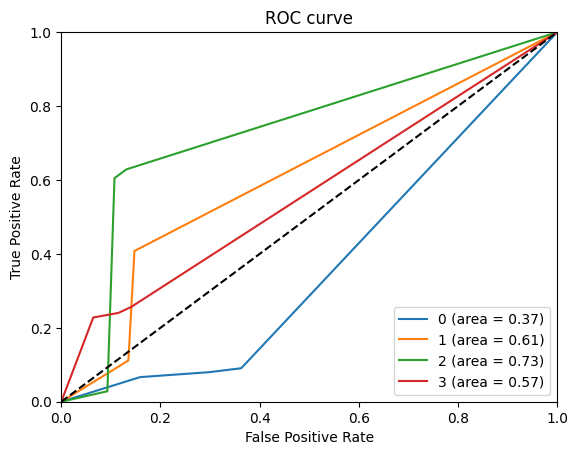

In [19]:
print("KNN accuracy: ", accuracy_score(y_test, y_pred_knn))

print("KNN f1: ", f1_score(y_test, y_pred_knn, average='weighted'))

print(classification_report(y_test, y_pred_knn))

print("\n\n\nConfusion Matrix: \n")

print(confusion_matrix(y_test, y_pred_knn))

fig, ax = plt.subplots()
for i in range(0, 4):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label=i)
    ax.plot(fpr, tpr, label= str(i)+' (area = %0.2f)' % auc(fpr, tpr))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')
ax.legend(loc="lower right")
plt.show()